In [1]:
import os 
import config as cfg
from dust3r.model import AsymmetricCroCo3DStereo 
import logging 
from dust3r.demo import get_reconstructed_scene, get_reconstructed_scene_with_known_poses
import matplotlib.pyplot as plt
import cv2
import torchvision.transforms as T
import open3d as o3d
import torch
import numpy as np
logging.basicConfig(
    level=logging.INFO,  # Set the logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s'  # Define the output format
)

device = cfg.DEVICE 
weights_path = cfg.MODEL_PATH   
model = AsymmetricCroCo3DStereo.from_pretrained(weights_path).to(device)
model.eval()
img_size = cfg.IMAGE_SIZE

# Log the device, and model path
logging.info(f"Device: {device}")
logging.info(f"Model Path: {weights_path}")

# Output directory
import datetime 
date_as_string = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
output_dir = cfg.OUTPUT_DIR + "/" + date_as_string
# Create the output directory if it does not exist
os.makedirs(output_dir, exist_ok=True)


logging.info(f"Output Directory: {output_dir}")

# Data directory
data_dir = cfg.DATA_DIR
logging.info(f"Data Directory: {data_dir}")
filelist = os.listdir(data_dir) #return full path
filelist = [os.path.join(data_dir, x) for x in filelist]
logging.info(f"Filelist: {filelist}")
print("cfg.KNOWN_POSES", cfg.KNOWN_POSES)
print("Lenght of knownposes", len(cfg.KNOWN_POSES))



def load_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    transform = T.Compose([T.ToTensor()])
    return transform(img).unsqueeze(0)  # Shape: (1, C, H, W)

img1 = load_image(filelist[0]).to(device)
img2 = load_image(filelist[1]).to(device)
print("img1", img1.shape)   
print("img2", img2.shape)

inputs1 = {'img': img1, 'instance': [], 'true_shape': torch.tensor(img1.shape[-2:])[None]}
inputs2 = {'img': img2, 'instance': [], 'true_shape': torch.tensor(img2.shape[-2:])[None]}



with torch.no_grad():
    outputs = model(inputs1, inputs2)
    

Warning, cannot find cuda-compiled version of RoPE2D, using a slow pytorch version instead


/home/shashank/Documents/UniBonn/Sem5/aria-stereo-depth-completion/other_projects/dust3r/dust3r/cloud_opt/base_opt.py:275: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
DEBUG:matplotlib:matplotlib data path: /home/shashank/miniconda3/envs/dust3r/lib/python3.11/site-packages/matplotlib/mpl-data
DEBUG:matplotlib:CONFIGDIR=/home/shashank/.config/matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is linux
DEBUG:matplotlib:CACHEDIR=/home/shashank/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/shashank/.cache/matplotlib/fontlist-v390.json


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
... loading model from checkpoints/DUSt3R_ViTLarge_BaseDecoder_512_dpt.pth


/home/shashank/Documents/UniBonn/Sem5/aria-stereo-depth-completion/other_projects/dust3r/dust3r/model.py:30: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(

instantiating : AsymmetricCroCo3DStereo(enc_depth=24, dec_depth=12, enc_embed_dim=1024, dec_embed_dim=768, enc_num_heads=16, dec_num_heads=12, pos_embed='RoPE100', patch_embed_cls='PatchEmbedDust3R', img_size=(512, 512), head_type='dpt', output_mode='pts3d', depth_mode=('exp', -inf, inf), conf_mode=('exp', 1, inf), landscape_only=False)
Calling set_downstream_head
<All keys matched successfully>


INFO:root:Device: cuda
INFO:root:Model Path: checkpoints/DUSt3R_ViTLarge_BaseDecoder_512_dpt.pth
INFO:root:Output Directory: temp_test//2025-02-11_03-52-51
INFO:root:Data Directory: /home/shashank/Documents/UniBonn/Sem5/aria-stereo-depth-completion/Priliminary tests/two_images
INFO:root:Filelist: ['/home/shashank/Documents/UniBonn/Sem5/aria-stereo-depth-completion/Priliminary tests/two_images/rectified_slam_right_image.png', '/home/shashank/Documents/UniBonn/Sem5/aria-stereo-depth-completion/Priliminary tests/two_images/rectified_slam_left_image.png']


cfg.KNOWN_POSES tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 2.],
         [0., 0., 0., 1.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]], device='cuda:0')
Lenght of knownposes 3
img1 torch.Size([1, 3, 640, 480])
img2 torch.Size([1, 3, 640, 480])
Calling forward
Calling _encode_symmetrized
Calling _encode_image_pairs
Calling _encode_image
Calling _decoder


/home/shashank/Documents/UniBonn/Sem5/aria-stereo-depth-completion/other_projects/dust3r/dust3r/model.py:212: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):


Calling _downstream_head
Calling _downstream_head


DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/shashank/miniconda3/envs/dust3r/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/shashank/miniconda3/envs/dust3r/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/shashank/miniconda3/envs/

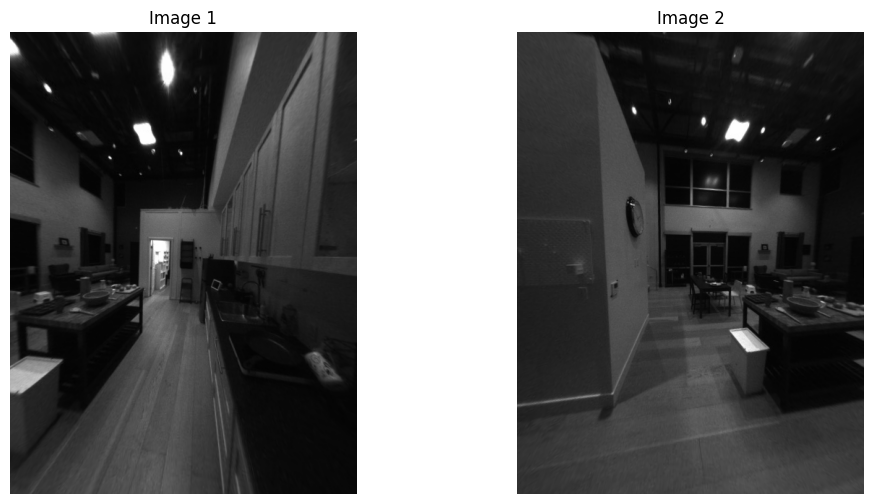

In [2]:
# Visualiza the two images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img1[0].permute(1, 2, 0).cpu().numpy())
ax[0].axis('off')
ax[0].set_title('Image 1')
ax[1].imshow(img2[0].permute(1, 2, 0).cpu().numpy())
ax[1].axis('off')
ax[1].set_title('Image 2')
plt.show()



DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7ee054afd0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7ee056c450>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7fb2362410>


pts3d dict_keys(['pts3d', 'conf'])
conf dict_keys(['conf', 'pts3d_in_other_view'])
pts3d torch.Size([2, 640, 480, 3])
pts3d_2 torch.Size([2, 640, 480, 3])
conf torch.Size([2, 640, 480])


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7fb22a5850>


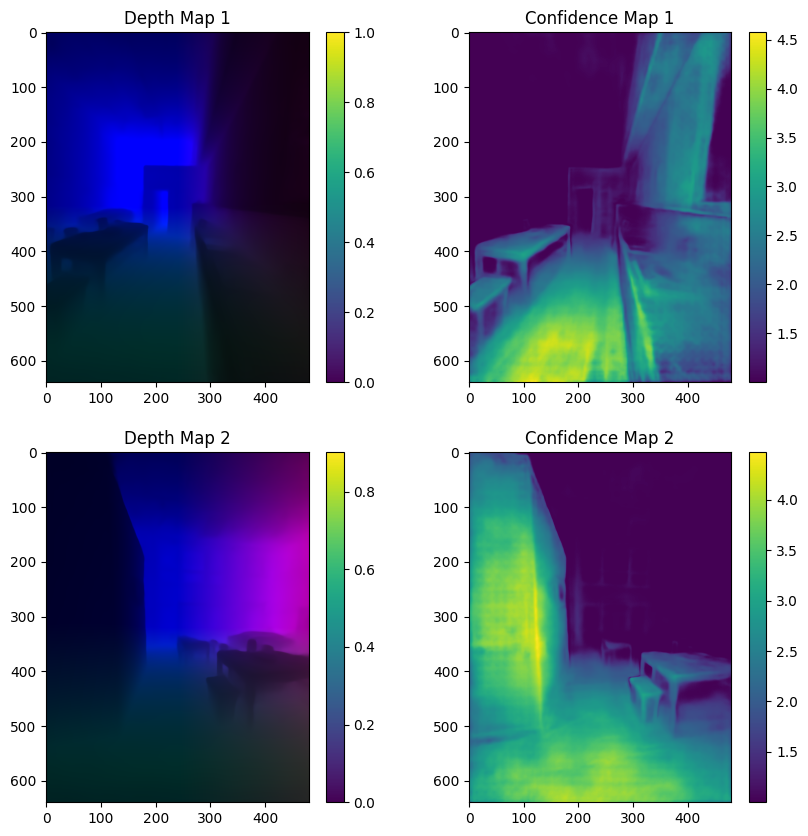

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7fb21467d0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7f6874ffd0>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7fb20e1710>
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7f7f6874fbd0>


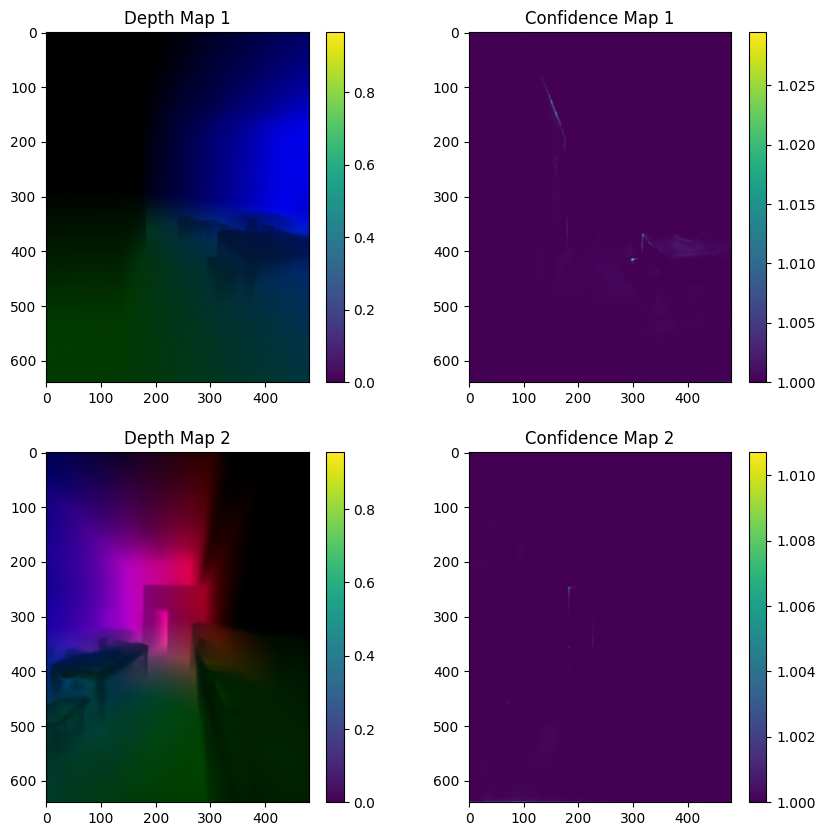

In [3]:
pred1 = outputs[0]
pred2 = outputs[1]
print("pts3d", pred1.keys())
print("conf", pred2.keys())

pts3d = pred1['pts3d']
pts3d_2 = pred2['pts3d_in_other_view']
print("pts3d", pts3d.shape)
print("pts3d_2", pts3d_2.shape)
print("conf", pred2['conf'].shape)

''' 
pts3d dict_keys(['pts3d', 'conf'])
conf dict_keys(['conf', 'pts3d_in_other_view'])
pts3d torch.Size([2, 640, 480, 3])
pts3d_2 torch.Size([2, 640, 480, 3])
conf torch.Size([2, 640, 480])

'''

# Visualize the pts3d - depth map as image and also conf map
pts3d_idx0 = pts3d[0].cpu().numpy()
pts3d_idx1 = pts3d[1].cpu().numpy()
conf_idx0 = pred1['conf'][0].cpu().numpy()
conf_idx1 = pred1['conf'][1].cpu().numpy()

# Visualize the pts3d - depth map as image and also conf map
pts3d_2_idx0 = pts3d_2[0].cpu().numpy()
pts3d_2_idx1 = pts3d_2[1].cpu().numpy()
conf_2_idx0 = pred2['conf'][0].cpu().numpy()
conf_2_idx1 = pred2['conf'][1].cpu().numpy()

# Visualize the depth map
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(pts3d_idx0)
plt.title('Depth Map 1')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(conf_idx0)
plt.title('Confidence Map 1')
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(pts3d_idx1)
plt.title('Depth Map 2')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(conf_idx1)
plt.title('Confidence Map 2')
plt.colorbar()
plt.savefig(output_dir + "/depth_confidence_map.png")
plt.show()

# Visualize the depth map of the other view
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(pts3d_2_idx0)
plt.title('Depth Map 1')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(conf_2_idx0)
plt.title('Confidence Map 1')
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(pts3d_2_idx1)
plt.title('Depth Map 2')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(conf_2_idx1)
plt.title('Confidence Map 2')
plt.colorbar()
plt.savefig(output_dir + "/depth_confidence_map_2.png")
plt.show()


